In [26]:
import numpy as np
import pandas as pd
import pickle
from scipy.special import expit
from scipy.stats import norm
from scipy import stats
from load_data import load_data
from open_file import open_file
import predict_score
import matplotlib.pyplot as plt
true = open_file("true_params.pkl")
self = open_file("self_params.pkl")

df = pd.read_csv("Exp2_Estimation.csv")
df_feedback = df[df.conditionshowFeedback == 0]
data = load_data(df_feedback)
I = data['I']
J = data['J']
df_self = data['df_self']
v = data['v']
data_other_true = data['data_other_true']
idx = data['idx']

a_self = self['a_self'][idx]
d_other = self['d_self'][idx]
sigma = self['sigma_self'][idx]
Sim_OtherEst = np.zeros((I, J))
delta = np.random.randn((I))
a_other = np.zeros((I))
K = 13


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 63.]),
 array([-230.9785929 , -207.75524009, -184.53188729, -161.30853448,
        -138.08518167, -114.86182886,  -91.63847605,  -68.41512324,
         -45.19177043,  -21.96841763,    1.25493518]),
 <BarContainer object of 10 artists>)

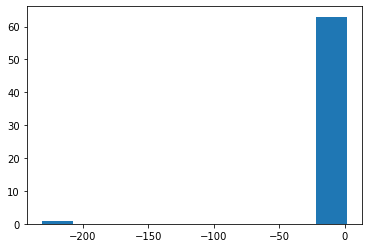

In [27]:
# plt.hist(np.around(d_other, 1).flatten())
# plt.plot()
plt.hist((a_self).flatten())

In [24]:
df = pd.read_csv("Exp2_Estimation.csv")
df_feedback = df[df.conditionshowFeedback == 1]
data = load_data(df_feedback)
I = data['I']
J = data['J']
df_self = data['df_self']
v = data['v']
data_other_true = data['data_other_true']
idx = data['idx']

a_self = self['a_self'][idx]
d_other = self['d_self'][idx]
sigma = self['sigma_self'][idx]
Sim_OtherEst = np.zeros((I, J))


(array([ 2.,  0.,  4.,  8., 18., 17.,  8.,  4.,  1.,  2.]),
 array([-1.39435992, -1.13354647, -0.87273303, -0.61191958, -0.35110614,
        -0.09029269,  0.17052075,  0.4313342 ,  0.69214764,  0.95296109,
         1.21377454]),
 <BarContainer object of 10 artists>)

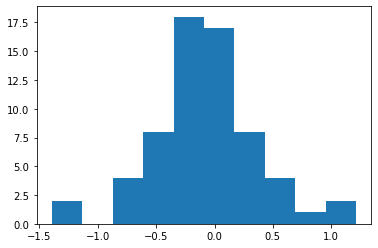

In [25]:
plt.hist((a_self).flatten())

(array([ 21., 201., 274., 354., 382., 315., 223., 129.,  92.,  57.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

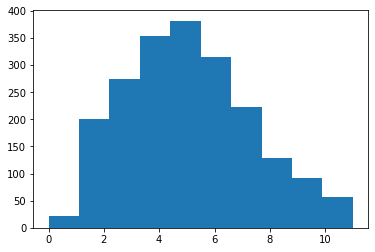

In [34]:
plt.hist(self['Sim_Y'].flatten())

(array([1., 0., 0., 2., 1., 1., 6., 1., 2., 2.]),
 array([-1.71436725, -1.46333732, -1.21230739, -0.96127746, -0.71024753,
        -0.4592176 , -0.20818767,  0.04284226,  0.29387219,  0.54490212,
         0.79593205]),
 <BarContainer object of 10 artists>)

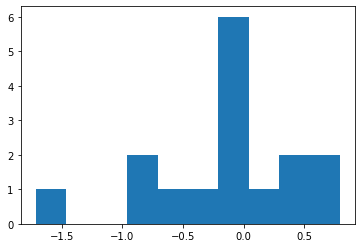

In [37]:
plt.hist(true['d_true'].flatten())

In [45]:
df_nf = open_file("hyp3-nofeedback/hyp3_nofeedback.pkl")
df_f = open_file("hyp3-feedback/hyp3_feedback.pkl")


(array([ 67.,  77., 121., 145., 139., 272.,  80.,  45.,  34.,  44.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

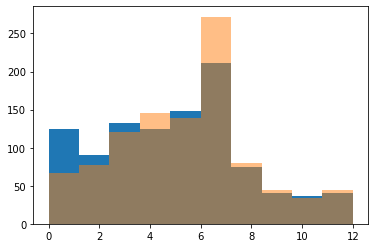

In [46]:
plt.hist(df_nf['Sim_OtherEst'].flatten())
plt.hist(df_f['Sim_OtherEst'].flatten(), alpha = .5)

(array([ 47.,  59.,  62., 109., 105., 263., 127.,  90.,  66.,  96.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

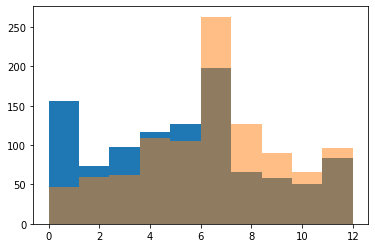

In [49]:
df_nf = open_file("hyp2-nofeedback/hyp2_nofeedback.pkl")
df_f = open_file("hyp2-feedback/hyp2_feedback64.pkl")
plt.hist(df_nf['Sim_OtherEst'].flatten())
plt.hist(df_f['Sim_OtherEst'].flatten(), alpha = .5)

(array([135.,  55.,  67.,  96.,  81., 172.,  79.,  87.,  79., 173.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

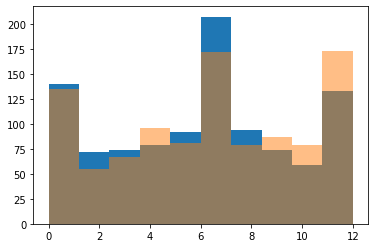

In [50]:
df_nf = open_file("hyp1-nofeedback/hyp1_nofeedback.pkl")
df_f = open_file("hyp1-feedback/hyp1_feedback64.pkl")
plt.hist(df_nf['Sim_OtherEst'].flatten())
plt.hist(df_f['Sim_OtherEst'].flatten(), alpha = .5)

(array([ 25.,  40.,  78., 107., 124., 256., 105., 102.,  84., 103.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

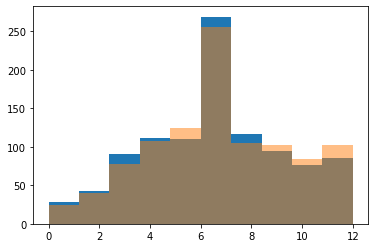

In [51]:
df = pd.read_csv("Exp2_Estimation.csv")
df_feedback = df[df.conditionshowFeedback == 1]
data = load_data(df_feedback)
data_self_true_1 = data['data_self_true']

df = pd.read_csv("Exp2_Estimation.csv")
df_feedback = df[df.conditionshowFeedback == 0]
data = load_data(df_feedback)
data_self_true_0 = data['data_self_true']


plt.hist(data_self_true_0.flatten())
plt.hist(data_self_true_1.flatten(), alpha = .5)

(array([ 29.,  62., 117., 198., 170., 131., 148.,  69.,  60.,  40.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

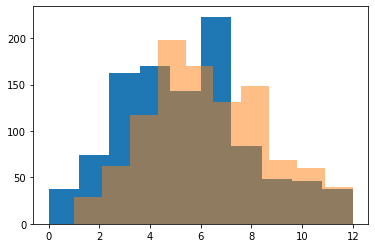

In [52]:
df = pd.read_csv("Exp2_Estimation.csv")
df_feedback = df[df.conditionshowFeedback == 1]
data = load_data(df_feedback)
data_self_est = data['data_self_est']
data_other_est = data['data_other_est']


plt.hist(data_self_est.flatten())
plt.hist(data_other_est.flatten(), alpha = .5)

(array([ 20.,  49., 107., 155., 157., 284., 106.,  63.,  49.,  34.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

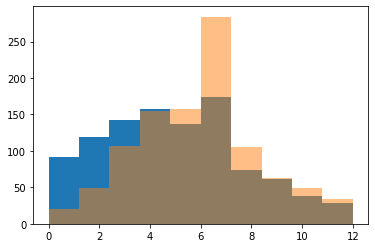

In [53]:
df = pd.read_csv("Exp2_Estimation.csv")
df_feedback = df[df.conditionshowFeedback == 0]
data = load_data(df_feedback)
data_self_est = data['data_self_est']
data_other_est = data['data_other_est']


plt.hist(data_self_est.flatten())
plt.hist(data_other_est.flatten(), alpha = .5)

In [55]:
df_nf = open_file("hyp2-nofeedback/hyp2_nofeedback.pkl")
df_f = open_file("hyp2-feedback/hyp2_feedback64.pkl")

df_nf['Sim_OtherEst'].mean(1)

array([ 6.0625,  2.5625,  5.875 ,  4.0625,  9.6875,  0.375 ,  8.375 ,
        4.75  ,  3.875 ,  6.125 ,  5.5625, 10.5   ,  4.875 ,  6.9375,
        3.4375,  6.125 ,  5.1875,  5.75  ,  4.125 ,  5.25  ,  7.0625,
        1.875 ,  3.25  ,  1.5   ,  4.25  ,  6.9375,  3.5625,  4.4375,
        1.9375,  2.4375,  7.0625,  7.0625,  8.125 ,  3.4375,  3.75  ,
        8.3125,  4.9375,  5.6875,  4.75  ,  8.75  ,  7.6875,  9.5   ,
        9.1875,  2.5   ,  2.125 , 10.375 ,  6.8125,  4.    ,  2.3125,
        3.125 ,  4.9375,  4.4375,  5.4375,  6.25  ,  5.375 ,  4.375 ,
        3.4375,  2.875 ,  4.9375,  5.8125,  2.125 , 11.125 ,  2.25  ,
        7.0625])

In [56]:
df_nf['Sim_OtherEst'][5]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 2., 2., 0., 1., 0., 0.])

In [68]:
self['a_self'].min()

-230.97859290308105

In [60]:
self['d_self'][14]

array([ 0.32129959, -0.31393644,  0.64775262,  0.48724785,  0.28269679,
        0.5057836 ,  0.28452357,  0.28109039,  0.01645169,  0.63934602,
        0.37571447,  0.3219574 ,  0.31012781,  0.24817665,  0.05661036,
        0.09642001])

In [57]:

df = pd.read_csv("Exp2_Estimation.csv")
df_feedback = df[df.conditionshowFeedback == 0]
data = load_data(df_feedback)
idx = data['idx']

In [58]:
idx

array([  3,   7,   8,  12,  14,  15,  17,  21,  23,  24,  25,  27,  31,
        34,  37,  39,  40,  41,  43,  44,  46,  47,  48,  49,  51,  56,
        57,  58,  60,  61,  62,  63,  64,  65,  67,  72,  73,  74,  76,
        77,  78,  79,  83,  87,  88,  92,  94,  95,  97,  98, 103, 104,
       105, 106, 108, 110, 111, 113, 116, 120, 122, 123, 125, 127])